# Backpropagation and Gradient Descent

## The backpropagation algorithm

1. $\hat{y} = \sigma(\sigma(\sigma(\bar{x}^T W_1)W_2)\bar{w}_3)$ with the input vector $\bar{x}$ and the weight matrix $W$

2. $loss = \sum_i \frac{1}{2} (\hat{y}_i - y_i)^2$ with the output of the network-function $\hat{y}$ and the target value $y$

3. $\nabla_{w_{out}}loss = \sum_j (y_i - \hat{y}_i) \cdot (-\sigma^\prime(\bar{a}_2 \bar{w_3})) \cdot \bar{a}_2$ with the network output $\hat{y}$, the target value $y$, the derivative of the activation function $\sigma^\prime$, the activation of the second hidden network-layer $\bar{a}_2 = \sigma(\bar{x}^T W_2)$ and the output weights $\bar{w}_3$

4. $\sigma^\prime(x) = \frac{0 \cdot (1 + e^{-x}) - 1 \cdot (-e^{-x})}{(1 + e^{-x})^2} = \frac{e^{-x}}{(1 + e^{-x})^2}$

## Cats and dogs

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [72]:
sample_size = 30

# create training data
np.random.seed(1)
cats = np.random.normal(25, 5, (2, sample_size))
dogs = np.random.normal(45, 15, (2, sample_size))

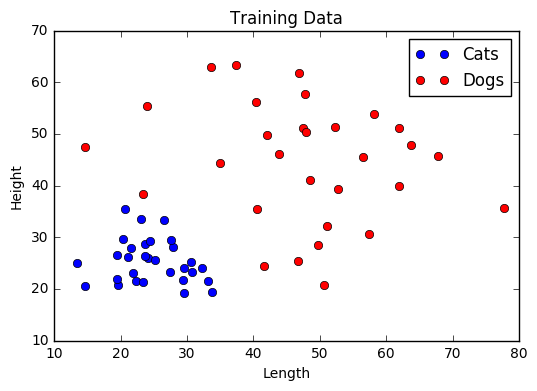

In [73]:
plt.plot(cats[0], cats[1], 'bo', dogs[0], dogs[1], 'ro')
plt.legend(['Cats', 'Dogs'])
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Training Data')
plt.show()

In [74]:
mean = np.mean(np.hstack((cats, dogs)), axis=1)
std = np.std(np.hstack((cats, dogs)), axis=1)

# normalize data
cats = ((cats.T - mean) / std).T
dogs = ((dogs.T - mean) / std).T

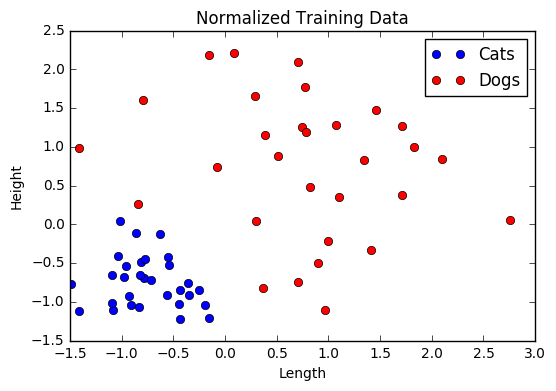

In [75]:
plt.plot(cats[0], cats[1], 'bo', dogs[0], dogs[1], 'ro')
plt.legend(['Cats', 'Dogs'])
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Normalized Training Data')
plt.show()

In [76]:
# logistic activation function
def activation(x, derive=False):
    if derive:
        return np.exp(-x) / (1 + np.exp(-x))**2
    return 1 / (1 + np.exp(-x))

In [77]:
# create labels
cats = np.vstack((cats, -np.ones(sample_size)))
dogs = np.vstack((dogs, np.ones(sample_size)))
data = np.hstack((cats, dogs))

In [78]:
# predict output value y
def predict(x, w):
    return activation(np.dot(x.T, w))

In [79]:
# square loss function
def loss(y, y_hat):
    return np.sum(0.5 * (y_hat - y)**2)

In [80]:
# calc gradient of the loss
def backprop(x, y, y_hat, w):
    return np.sum((y_hat - y) * activation(np.dot(x.T, w), True) * x, axis=1)

In [81]:
epochs = 60
learning_rate = 0.1

In [82]:
# init weights
weights = np.array([-2.5, -2.5])

plt_w = np.zeros((epochs, 2))
plt_el = np.zeros(epochs)

# batch gradient descent
for training_step in range(epochs):
    y_hat = predict(data[:2], weights)
    el = loss(data[2:], y_hat)
    weights -= learning_rate * backprop(data[:2], data[2:], y_hat, weights)
    plt_w[training_step] = weights
    plt_el[training_step] = el

In [83]:
# init weights
weights = np.array([-2.5, -2.5])

plt_w = np.zeros((epochs, 2))
plt_el = np.zeros(epochs)

# stochastic gradient descent
for training_step in range(60):
    np.random.shuffle(data.T)
    el = 0.0
    for i in range(len(data[0])):
        y_hat = predict(data[:2, i:i+1], weights)
        el += loss(data[2:, i:i+1], y_hat)
        weights -= learning_rate * backprop(data[:2, i:i+1], data[2:, i:i+1], y_hat, weights)
    plt_w[training_step] = weights
    plt_el[training_step] = el

In [84]:
batch_size = 5

# init weights
weights = np.array([-2.5, -2.5])

plt_w = np.zeros((epochs, 2))
plt_el = np.zeros(epochs)

# mini-batch gradient descent
for training_step in range(60):
    np.random.shuffle(data.T)
    el = 0.0
    for i in range(0, len(data[0]), batch_size):
        y_hat = predict(data[:2, i:i+batch_size], weights)
        el += loss(data[2:, i:i+batch_size], y_hat)
        weights -= learning_rate * backprop(data[:2, i:i+batch_size], data[2:, i:i+batch_size], y_hat, weights)
    plt_w[training_step] = weights
    plt_el[training_step] = el

/home/matthias/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/matthias/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


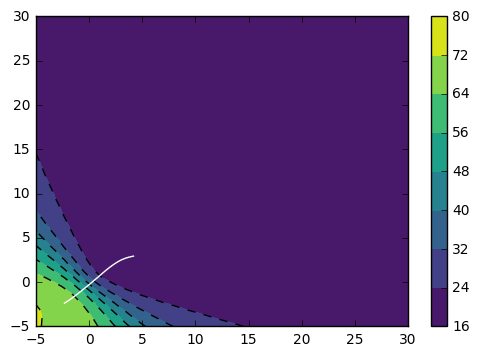

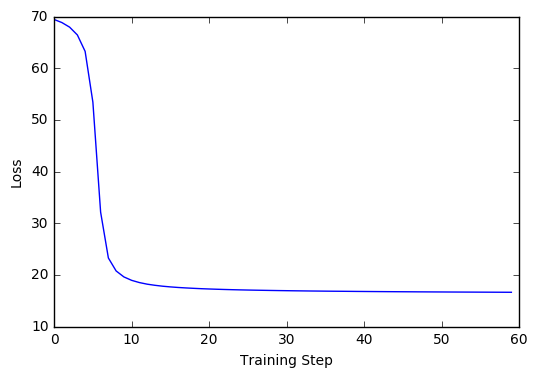

In [85]:
# plot error surface
fig, ax = plt.subplots()
x = np.linspace(-5, 30, 40)
y = np.linspace(-5, 30, 40)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = loss(data[2:], predict(data[:2], np.array([X[i,j], Y[i,j]])))

cp = ax.contourf(X, Y, Z, cmap='viridis')
ax.contour(X, Y, Z, colors='black', linestyles='dashed')
ax.plot(plt_w[:,0], plt_w[:,1], 'w')
fig.colorbar(cp)

# plot square loss
fig, ax = plt.subplots()
ax.plot(range(epochs), plt_el)
plt.xlabel('Training Step')
plt.ylabel('Loss')

plt.show()

## Momentum

In [86]:
# init weights
weights = np.array([-2.5, -2.5])
delta_w = np.zeros(2)

momentum = 0.9

plt_w = np.zeros((epochs, 2))
plt_el = np.zeros(epochs)

# batch gradient descent with momentum
for training_step in range(epochs):
    y_hat = predict(data[:2], weights)
    el = loss(data[2:], y_hat)
    delta_w = momentum * delta_w + learning_rate * backprop(data[:2], data[2:], y_hat, weights)
    weights -= delta_w
    plt_w[training_step] = weights
    plt_el[training_step] = el